# Ratios de convergencia

**Ratio de convergencia lineal:** $\;$ en problemas convexos, descenso por gradiente **converge linealmente con ratio (orden)** $\mu\in(0,1)$
$$\lvert\mathcal{L}(\boldsymbol{\theta}_{t+1})-\mathcal{L}(\boldsymbol{\theta_*})\rvert\leq\mu%
\lvert\mathcal{L}(\boldsymbol{\theta}_t)-\mathcal{L}(\boldsymbol{\theta_*})\rvert$$

**Objetivo cuadrático:** $\;$ si $\,\mathcal{L}(\boldsymbol{\theta})=\frac{1}{2}\boldsymbol{\theta}^t\mathbf{A}\boldsymbol{\theta}+\boldsymbol{b}^t\boldsymbol{\theta}+c,\,$ $\,\mathbf{A}\succ\boldsymbol{0},\,$ $\mu$ es función del número de condición de $\mathbf{A}$, $\kappa(\mathbf{A})=\dfrac{\lambda_{\text{max}}}{\lambda_{\text{min}}}$
$$\mu=\left(\frac{\lambda_{\text{max}}(\mathbf{A})-\lambda_{\text{min}}(\mathbf{A})}%
{\lambda_{\text{max}}(\mathbf{A})+\lambda_{\text{min}}(\mathbf{A})}\right)^2%
=\left(\frac{\kappa(\mathbf{A})-1}{\kappa(\mathbf{A})+1}\right)^2%
\Rightarrow\lim_{\kappa\to1^+}\mu(\kappa)=0$$

**Objetivo no cuadrático:** $\;$ si es localmente cuadrático, $\mu$ dependerá del número de condición de la Hessiana ($\mathbf{A}$)

**Ejemplo:** $\;\mathbf{A}=\begin{pmatrix}20&5\\5&16\end{pmatrix}\,$ bien condicionada y 
$\;\mathbf{A}=\begin{pmatrix}20&5\\5&2\end{pmatrix}\,$ peor condicionada; $\;\boldsymbol{b}=(-14, -6)^t$, $\;c=10$

Número de condición:  30.2336


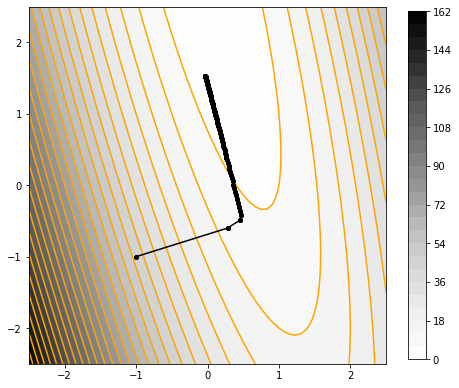

In [1]:
import numpy as np
import matplotlib.pyplot as plt
eta = 2e-2 # <--- con otros valores no converge o lo hace muy lentamente
# A, b, c = np.array([ [20, 5], [5, 16] ]), np.array([-14, -6]), 10 # <--- bien condicionada
A, b, c = np.array([ [20, 5], [5,  2] ]), np.array([-14, -6]), 10 # <--- mal condicionada
print("Número de condición: ", np.round(np.linalg.cond(A), 4))
L = lambda t: 0.5 * t.T @ A @ t + b @ t + c
theta1, theta2 = np.meshgrid(np.linspace(-2.5, 2.5, num=64), np.linspace(-2.5, 2.5, num=64))
theta = np.squeeze(np.dstack([np.ravel(theta1), np.ravel(theta2)]))
Ltheta = np.apply_along_axis(L, 1, theta)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal')
ax.contour(theta1, theta2, Ltheta.reshape(theta1.shape), 30, colors='orange')
cp = ax.contourf(theta1, theta2, Ltheta.reshape(theta1.shape), 30, cmap='Greys')
plt.colorbar(cp, ax=ax, shrink=0.8)
grad = lambda t: (A + A.T) @ t + b
theta, tol, delta, t = -1.0 * np.ones(2), 0.01, np.inf, 1
while np.max(np.abs(delta)) > tol and t < 100: # <--- número máximo de iteraciones
    oldtheta = np.copy(theta)
    theta = theta - eta * grad(theta)
    t = t + 1
    plt.plot([oldtheta[0], theta[0]], [oldtheta[1], theta[1]], 'o-k', markersize=4)